# Algorithmic composition by conditional GAN (like MidiNet).

This notebook demonstrates an Algorithmic Composition, which is the technique of using algorithms, especially recent machine learning algorithms, to create music.

Here, referring to the case of *MidiNet* model for symbolic-domain music generation(Yang, L. C., et al., 2017), Conditional GAN is used as an algorithm for composing music. MidiNet can be expanded to generate music with multiple MIDI channels (i.e. tracks), using convolutional and *de*convolutional neural networks.

<img src="img/system_diagram_of_the_MidiNet.png" />
<div>
Yang, L. C., Chou, S. Y., & Yang, Y. H. (2017). MidiNet: A convolutional generative adversarial network for symbolic-domain music generation. arXiv preprint arXiv:1703.10847., p3.
</div>

## Import and setup modules.

Make settings for this library and for visualization.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

In [2]:
from pycomposer.gancomposable.conditional_gan_composer import ConditionalGANComposer

Let's make it possible to confirm later that learning is working according to GAN theory by the logger of Python.

In [3]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR
logger = getLogger("pygan")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

Instantiate the required class.

In [4]:
gan_composer = ConditionalGANComposer(
    # `list` of Midi files to learn.
    midi_path_list=[
        "../../../../Downloads/Beethoven_gekko_3_k.mid"
    ], 
    # Batch size.
    batch_size=20,
    # The length of sequence that LSTM networks will observe.
    seq_len=8,
    # Learning rate in `Generator` and `Discriminator`.
    learning_rate=1e-10,
    # Time fraction or time resolution (seconds).
    time_fraction=0.5,
    # The number of units in hidden layer of `DiscriminativeModel`.
    hidden_dim=105920
)

**Note** that the value of `hidden_dim` depends on the values of `seq_len` and `time_fraction` because the Symbolic Representation for Convolutional/Deconvolutional neural networks(Yang, L. C., et al., 2017) is the theoretical background.

## Learning.

Execute learning. The learning algorithm is based on a mini-batch stochastic gradient descent training of generative adversarial nets. The number of steps to apply to the discriminator, `k_step`, is a hyperparameter.  For instance, Goodfellow, I. et al.(2014) used `k = 1`, the least expensive option. Not limited to this parameter, the appropriate value of the hyperparameter is unknown.

In [5]:
gan_composer.learn(iter_n=100, k_step=10)

----------------------------------------------------------------------------------------------------
Iterations: (1/100)
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.47658672485016823
And update the `discriminator` by descending its stochastic gradient(means): -3.377732337121175
Probability inferenced by the `discriminator` (mean): 0.5515114470925733
And update the `discriminator` by descending its stochastic gradient(means): -3.766322960482511
Probability inferenced by the `discriminator` (mean): 0.4518765975248976
And update the `discriminator` by descending its stochastic gradient(means): -3.5755448079900254
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
---------------

And update the `discriminator` by descending its stochastic gradient(means): -3.1994300692293596
Probability inferenced by the `discriminator` (mean): 0.30503504580397356
And update the `discriminator` by descending its stochastic gradient(means): -4.2203519888054455
Probability inferenced by the `discriminator` (mean): 0.5591107027099566
And update the `discriminator` by descending its stochastic gradient(means): -3.5022061648344605
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Loss of Feature matching: 8.477155056123266e-06
Probability inferenced by the `discriminator` (mean): 0.32634505336266273
And update the `generator` by descending its stochastic gradient(means): 0.0012001132930513593
----------------------------------------------------------------------------------------------------
Iterations: (8/100

----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Loss of Feature matching: 8.406266179106438e-06
Probability inferenced by the `discriminator` (mean): 0.41103467654065307
And update the `generator` by descending its stochastic gradient(means): 0.0012001132930513647
----------------------------------------------------------------------------------------------------
Iterations: (14/100)
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4106945146081684
And update the `discriminator` by descending its stochastic gradient(means): -3.4041872000868763
Probability inferenced by the `disc

----------------------------------------------------------------------------------------------------
Iterations: (20/100)
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4948508507342228
And update the `discriminator` by descending its stochastic gradient(means): -3.1950235836147436
Probability inferenced by the `discriminator` (mean): 0.48283907712191604
And update the `discriminator` by descending its stochastic gradient(means): -3.5161861326952626
Probability inferenced by the `discriminator` (mean): 0.5023030364390134
And update the `discriminator` by descending its stochastic gradient(means): -3.2014768470470814
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
------------

And update the `discriminator` by descending its stochastic gradient(means): -3.238240289710439
Probability inferenced by the `discriminator` (mean): 0.4443855195310036
And update the `discriminator` by descending its stochastic gradient(means): -3.5603495004663364
Probability inferenced by the `discriminator` (mean): 0.5534982362870248
And update the `discriminator` by descending its stochastic gradient(means): -3.2396549878157272
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Loss of Feature matching: 2.5280860558889003e-05
Probability inferenced by the `discriminator` (mean): 0.3769045362406706
And update the `generator` by descending its stochastic gradient(means): 0.0012001132930513608
----------------------------------------------------------------------------------------------------
Iterations: (27/100)

----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Loss of Feature matching: 2.636947024947693e-05
Probability inferenced by the `discriminator` (mean): 0.41732483279454424
And update the `generator` by descending its stochastic gradient(means): 0.0012001132930513658
----------------------------------------------------------------------------------------------------
Iterations: (33/100)
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4830446020603204
And update the `discriminator` by descending its stochastic gradient(means): -3.01981296948815
Probability inferenced by the `discri

----------------------------------------------------------------------------------------------------
Iterations: (39/100)
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.5025913611590179
And update the `discriminator` by descending its stochastic gradient(means): -3.5463854833411554
Probability inferenced by the `discriminator` (mean): 0.6973342340950153
And update the `discriminator` by descending its stochastic gradient(means): -3.487324016571055
Probability inferenced by the `discriminator` (mean): 0.2998837932545789
And update the `discriminator` by descending its stochastic gradient(means): -2.650095994024632
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
---------------

And update the `discriminator` by descending its stochastic gradient(means): -4.156147169061401
Probability inferenced by the `discriminator` (mean): 0.6387443228219731
And update the `discriminator` by descending its stochastic gradient(means): -3.3341270426819967
Probability inferenced by the `discriminator` (mean): 0.5016030056573619
And update the `discriminator` by descending its stochastic gradient(means): -3.318052943309914
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Loss of Feature matching: 8.333049023966169e-06
Probability inferenced by the `discriminator` (mean): 0.6379411501580894
And update the `generator` by descending its stochastic gradient(means): 0.0012001132930513814
----------------------------------------------------------------------------------------------------
Iterations: (46/100)
-

Keyboard Interrupt.


## Visualization.



In [8]:
d_logs_list, g_logs_list = gan_composer.extract_logs()

The shape is:
- `list` of probabilities inferenced by the `discriminator` (mean) in the `discriminator`'s update turn.
- `list` of probabilities inferenced by the `discriminator` (mean) in the `generator`'s update turn.

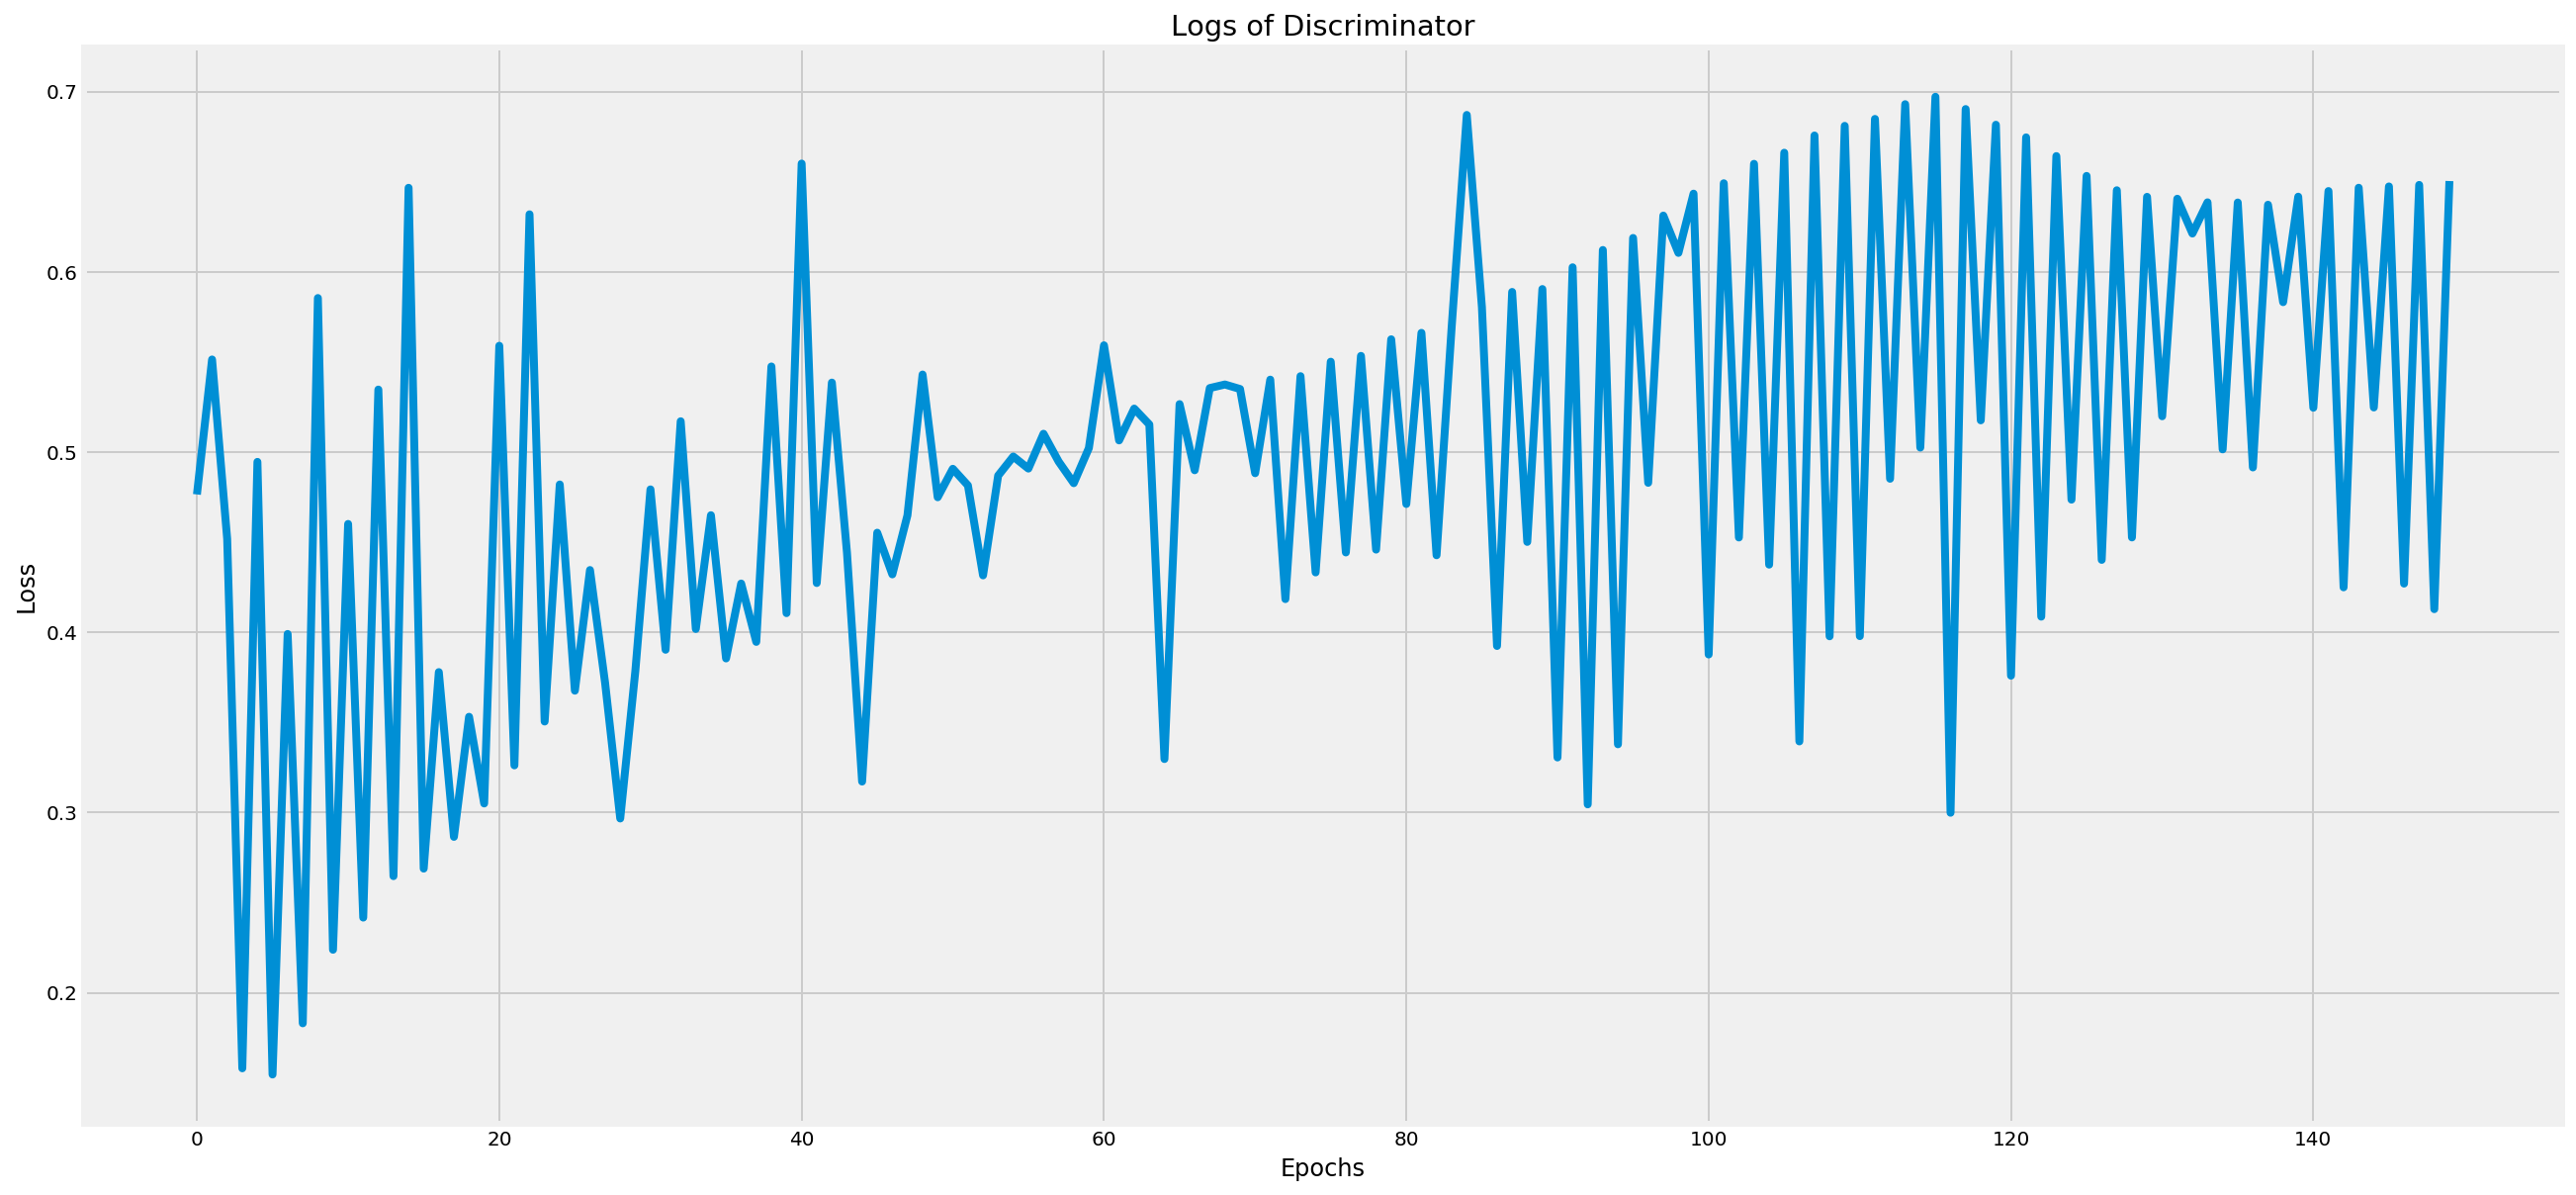

In [9]:
plt.figure(figsize=(20, 10))

plt.plot(d_logs_list)
plt.title("Logs of Discriminator")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

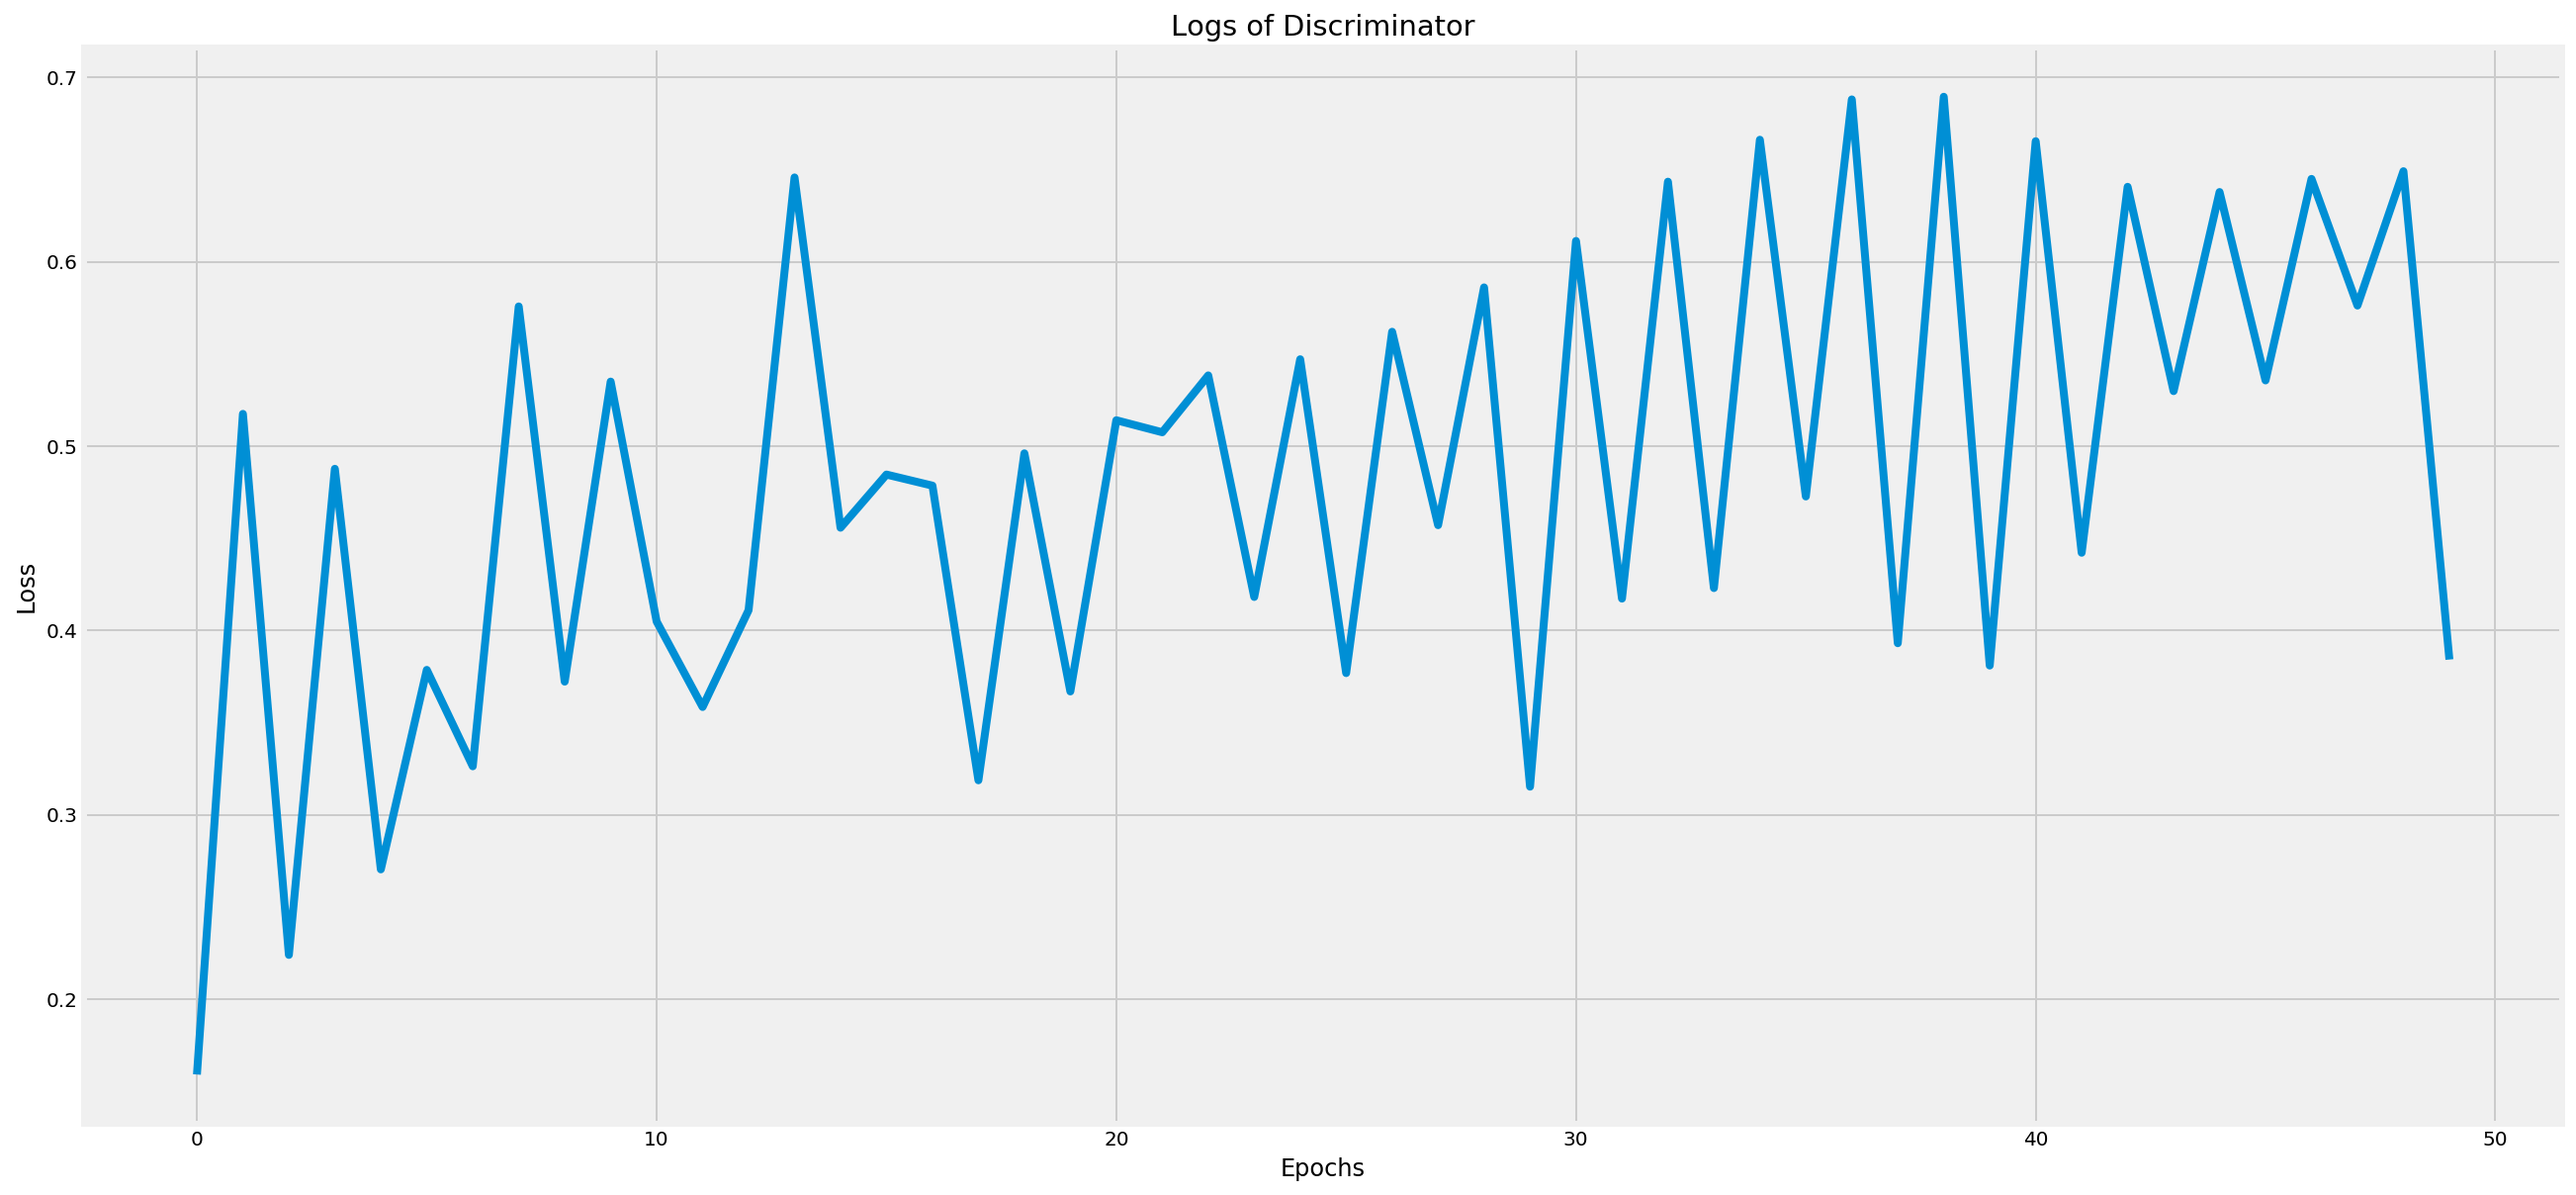

In [11]:
plt.figure(figsize=(20, 10))

plt.plot(g_logs_list)
plt.title("Logs of Discriminator")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(d_logs_list)
plt.title("Logs of Generator")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
gan_composer.compose(
    file_path="../../../../Documents/demo3.midi", 
    velocity_mean=None, 
    velocity_std=None
)

# References.

- Goodfellow, I., Pouget-Abadie, J., Mirza, M., Xu, B., Warde-Farley, D., Ozair, S., ... & Bengio, Y. (2014). Generative adversarial nets. In Advances in neural information processing systems (pp. 2672-2680).
- Mirza, M., & Osindero, S. (2014). Conditional generative adversarial nets. arXiv preprint arXiv:1411.1784.
- Yang, L. C., Chou, S. Y., & Yang, Y. H. (2017). MidiNet: A convolutional generative adversarial network for symbolic-domain music generation. arXiv preprint arXiv:1703.10847.